1. load p450 data,p450diffusion data and evodiffp450 data
2. conut aa num
3. draw

In [10]:
from collections import Counter

from Bio import SeqIO

NATURE_SEQUENCE_PATH = "data/DMs/p450/consensus.fasta"
P450DIFFUSION_PATH = "data/P450Diffusion/generate/1.fasta"
P450DIFF2_PATH = "data/DMs/fine-tune/merged.fasta"

# 1 load data

In [11]:
def count_aa(fasta_path):
    aa_counter = Counter()
    outDict = {}
    # read fasta

    for record in SeqIO.parse(fasta_path, "fasta"):
        seq = str(record.seq).replace("*", "").replace("X", "")
        aa_counter = Counter(seq)
        for aa, count in sorted(aa_counter.items()):
            percentage = (count / len(seq)) * 100
            if aa not in outDict:
                outDict[aa] = [percentage]
            else:
                outDict[aa].append(percentage)
    return outDict

# 2 cont

In [12]:
natureAA = count_aa(NATURE_SEQUENCE_PATH)
P450diffusionAA = count_aa(P450DIFFUSION_PATH)
P450diff2AA = count_aa(P450DIFF2_PATH)

In [13]:
import pandas as pd


def convert_to_df(aa_dict, label):
    data = []
    for aa, values in aa_dict.items():
        for v in values:
            data.append({"AminoAcid": aa, "Percentage": v, "Method": label})
    return pd.DataFrame(data)


df1 = convert_to_df(natureAA, "Nature")
df2 = convert_to_df(P450diffusionAA, "P450Diffusion")
df3 = convert_to_df(P450diff2AA, "P450Diff2")

all_df = pd.concat([df1, df2, df3])

# 3 draw

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

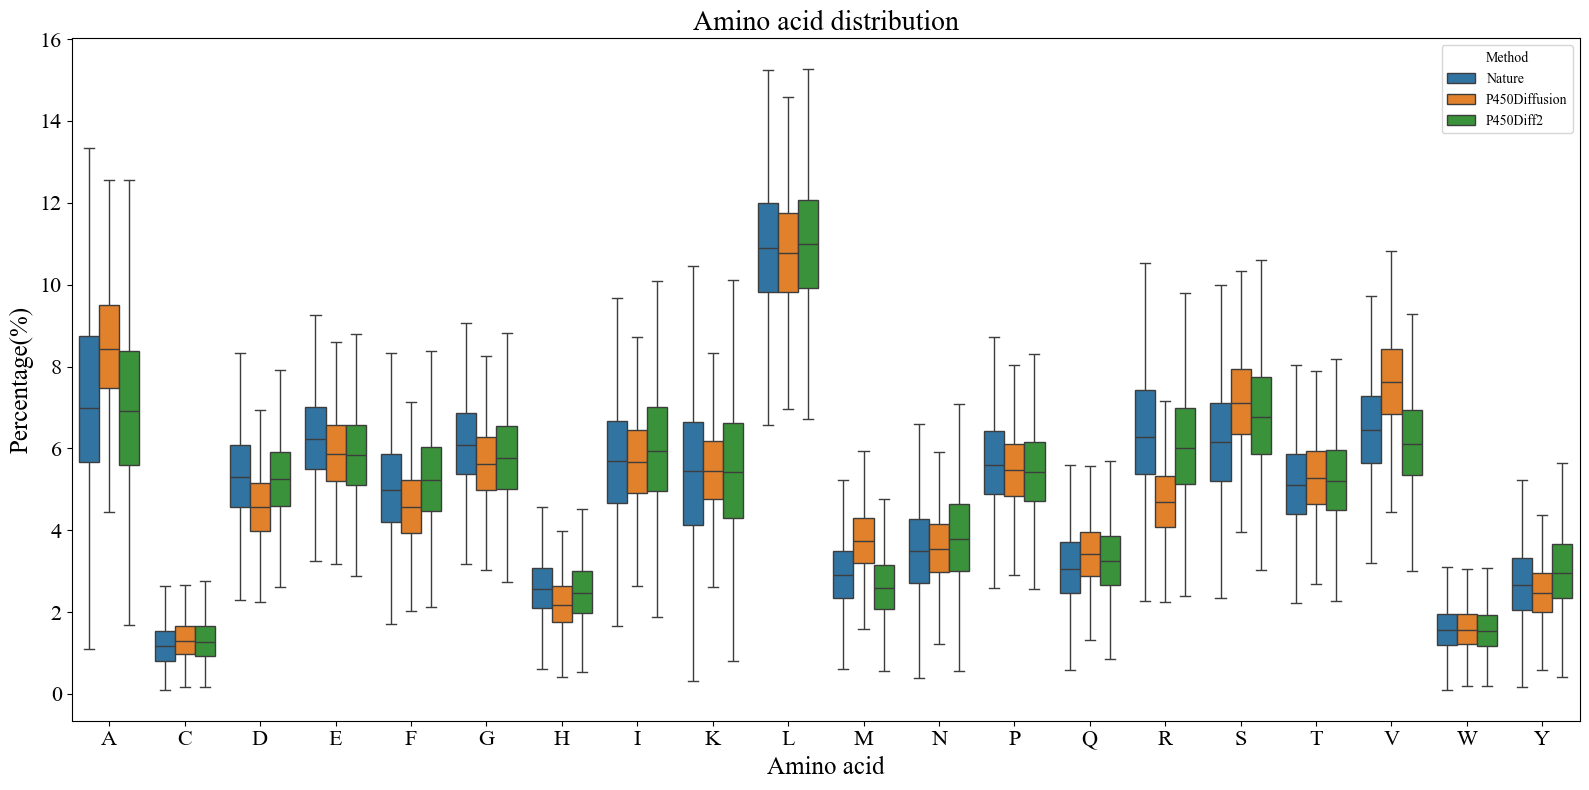

In [17]:
FONT_PATH = "data/font/Times New Roman.ttf"
font_prop = font_manager.FontProperties(fname=FONT_PATH)


plt.figure(figsize=(16, 8))
sns.boxplot(data=all_df, x="AminoAcid", y="Percentage", hue="Method", showfliers=False)


plt.title("Amino acid distribution", fontproperties=font_prop, fontsize=20)
plt.xlabel("Amino acid", fontproperties=font_prop, fontsize=18)
plt.ylabel("Percentage(%)", fontproperties=font_prop, fontsize=18)


plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)

plt.legend(title="Method", prop=font_prop, title_fontproperties=font_prop)


plt.tight_layout()
plt.savefig("data/pic/aa_distribution.png", dpi=300)
plt.show()